In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('./raw_data/MortgageComplaints.xlsx', 
                   dtype={'zip_code':'str'},
                   parse_dates=True)

In [3]:
df.head()

,complaint_what_happened,date_sent_to_company,issue,sub_product,zip_code,tags,complaint_id,timely,consumer_consent_provided,company_response,company,date_received,state,company_public_response,sub_issue
0,NaN,2019-04-01T12:00:00-05:00,Trouble during payment process,Home equity loan or line of credit (HELOC),80120,"Older American, Servicemember",3197211,Yes,Consent not provided,Closed with explanation,ZIONS BANCORPORATION,2019-03-31T12:00:00-05:00,CO,Company has responded to the consumer and the ...,NaN
1,NaN,2019-04-04T12:00:00-05:00,Trouble during payment process,FHA mortgage,32927,Servicemember,3197190,Yes,Consent not provided,Closed with explanation,"LoanCare, LLC",2019-03-31T12:00:00-05:00,FL,Company has responded to the consumer and the ...,NaN
2,XXXX : I received a call from CFPB to confirm ...,2019-04-02T12:00:00-05:00,Applying for a mortgage or refinancing an exis...,Conventional home mortgage,85032,NaN,3197134,Yes,Consent provided,Closed with explanation,"SELECT PORTFOLIO SERVICING, INC.",2019-03-31T12:00:00-05:00,AZ,Company believes it acted appropriately as aut...,NaN
3,NaN,2019-03-31T12:00:00-05:00,Trouble during payment process,Conventional home mortgage,15423,Older American,3197066,Yes,Consent not provided,Closed with explanation,"Flagstar Bank, N.A.",2019-03-31T12:00:00-05:00,PA,Company has responded to the consumer and the ...,NaN
4,NaN,2019-03-31T12:00:00-05:00,Applying for a mortgage or refinancing an exis...,FHA mortgage,78130,NaN,3197016,Yes,Consent not provided,Closed with monetary relief,"KBHS Home Loans, LLC",2019-03-31T12:00:00-05:00,TX,Company has responded to the consumer and the ...,NaN


In [4]:
df['date_received'] = pd.to_datetime(df.date_received)

In [5]:
df['year'] = [x.year for x in df.date_received]

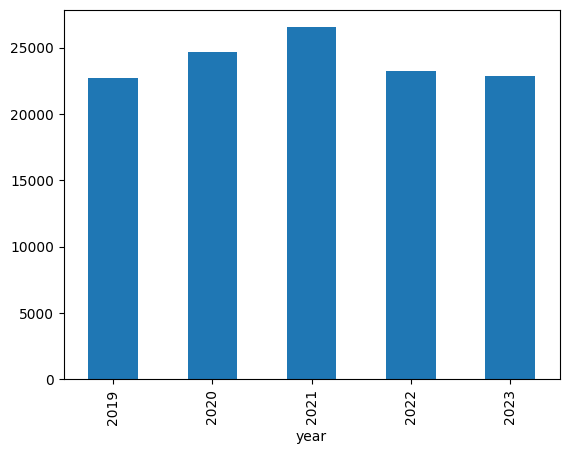

In [6]:
_ = df.year.value_counts().sort_index().plot(kind="bar")

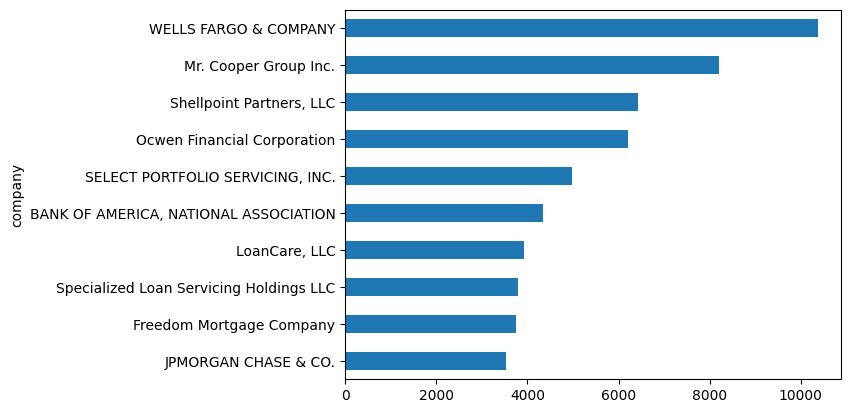

In [7]:
_ = df.value_counts('company').head(10).sort_values().plot(kind='barh')

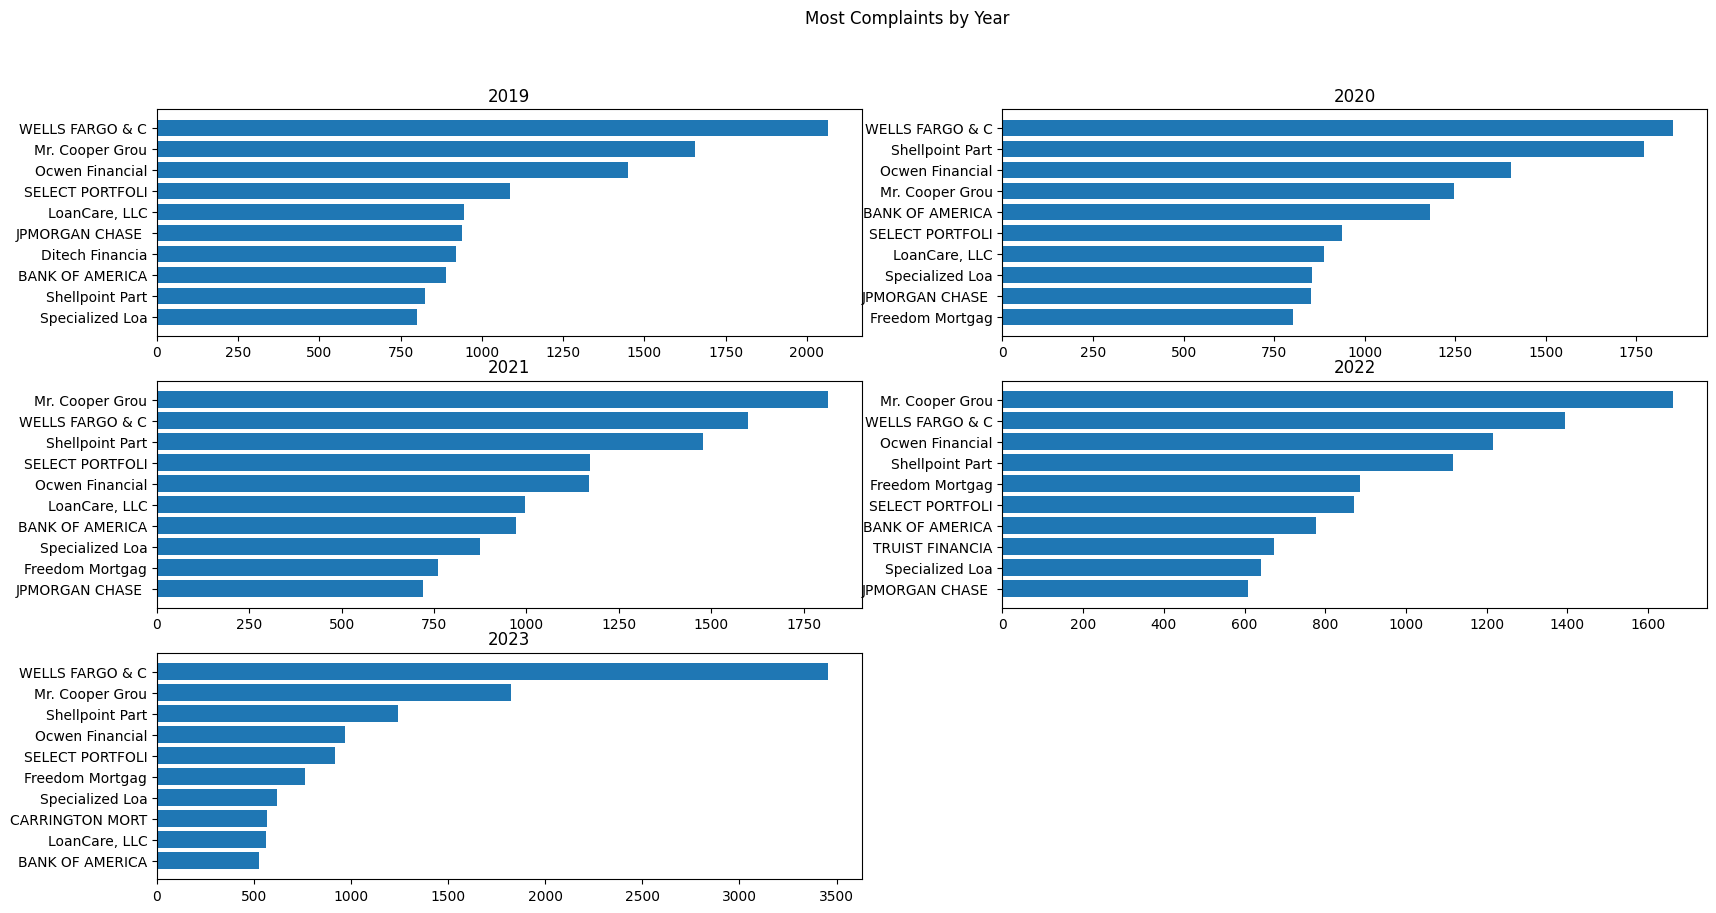

In [8]:
fig = plt.figure(figsize=(20, 10))

_ = plt.subplot(3, 2, 1)
_2019 = df.loc[df.year==2019].value_counts('company').head(10).sort_values().reset_index()
_2019['company'] = [x[:15] for x in _2019.company]
_ = plt.barh(_2019['company'], _2019['count'])
_ = plt.title('2019')

_ = plt.subplot(3, 2, 2)
_2020 = df.loc[df.year==2020].value_counts('company').head(10).sort_values().reset_index()
_2020['company'] = [x[:15] for x in _2020.company]
_ = plt.barh(_2020['company'], _2020['count'])
_ = plt.title('2020')

_ = plt.subplot(3, 2, 3)
_2021 = df.loc[df.year==2021].value_counts('company').head(10).sort_values().reset_index()
_2021['company'] = [x[:15] for x in _2021.company]
_ = plt.barh(_2021['company'], _2021['count'])
_ = plt.title('2021')

_ = plt.subplot(3, 2, 4)
_2022 = df.loc[df.year==2022].value_counts('company').head(10).sort_values().reset_index()
_2022['company'] = [x[:15] for x in _2022.company]
_ = plt.barh(_2022['company'], _2022['count'])
_ = plt.title('2022')

_ = plt.subplot(3, 2, 5)
_2023 = df.loc[df.year==2023].value_counts('company').head(10).sort_values().reset_index()
_2023['company'] = [x[:15] for x in _2023.company]
_ = plt.barh(_2023['company'], _2023['count'])
_ = plt.title('2023')

plt.suptitle('Most Complaints by Year')
plt.show()

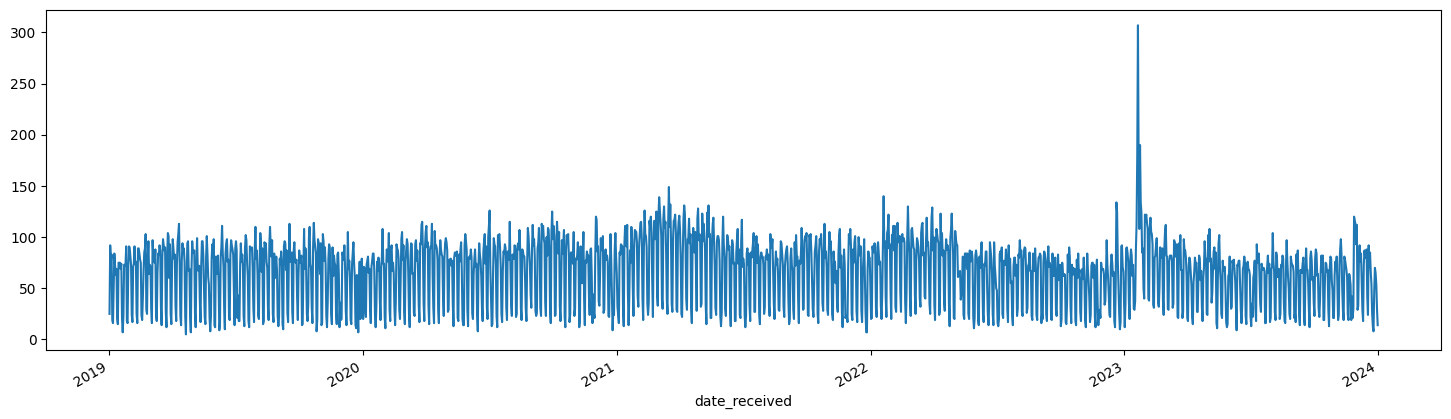

In [9]:
plt.figure(figsize=(18,5))
_ = df.date_received.value_counts().plot()

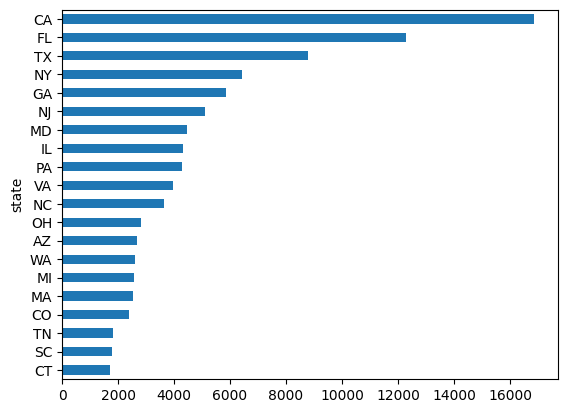

In [10]:
_ = df.state.value_counts().head(20).sort_values().plot(kind='barh')

<Axes: ylabel='issue'>

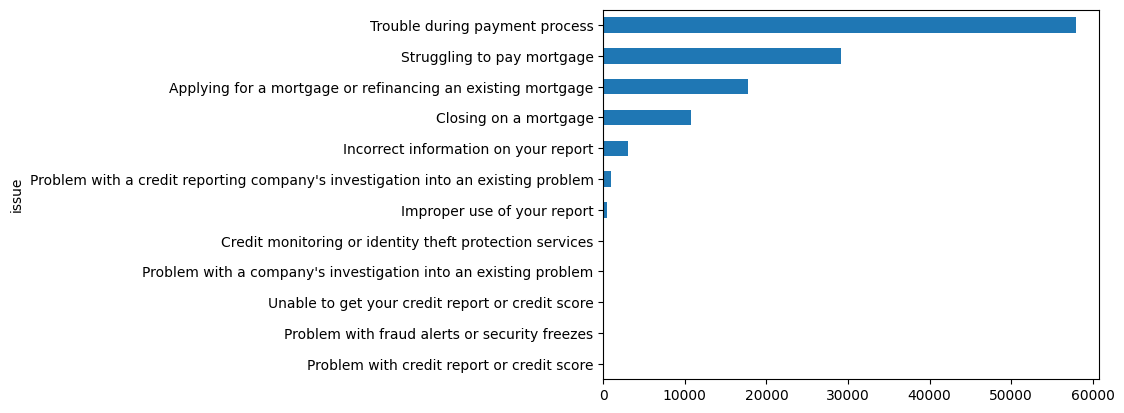

In [11]:
df.issue.value_counts().head(20).sort_values().plot(kind='barh')

<Axes: ylabel='sub_issue'>

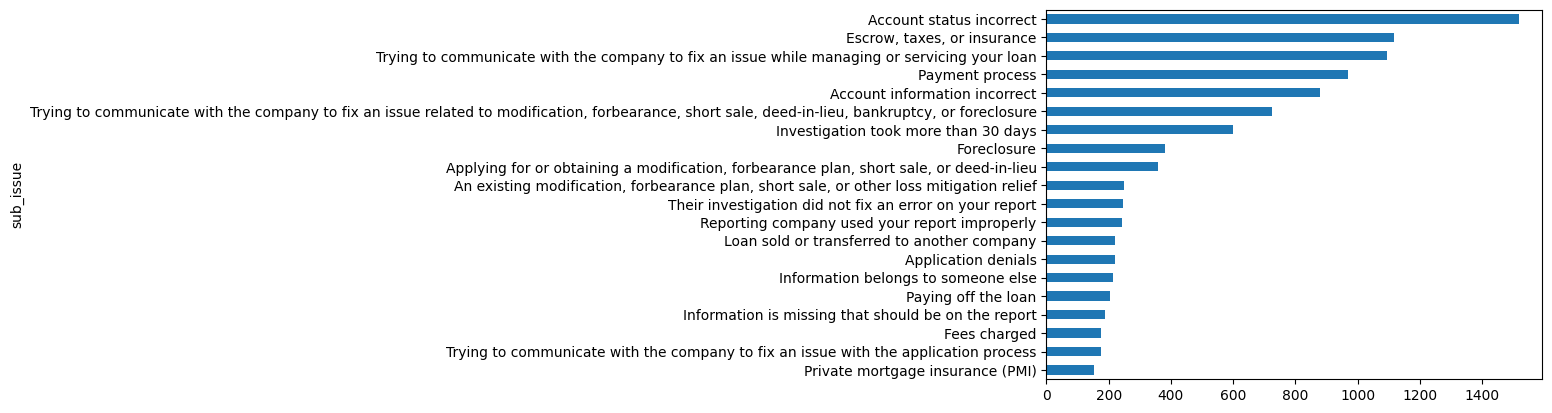

In [12]:
df.sub_issue.value_counts().head(20).sort_values().plot(kind='barh')

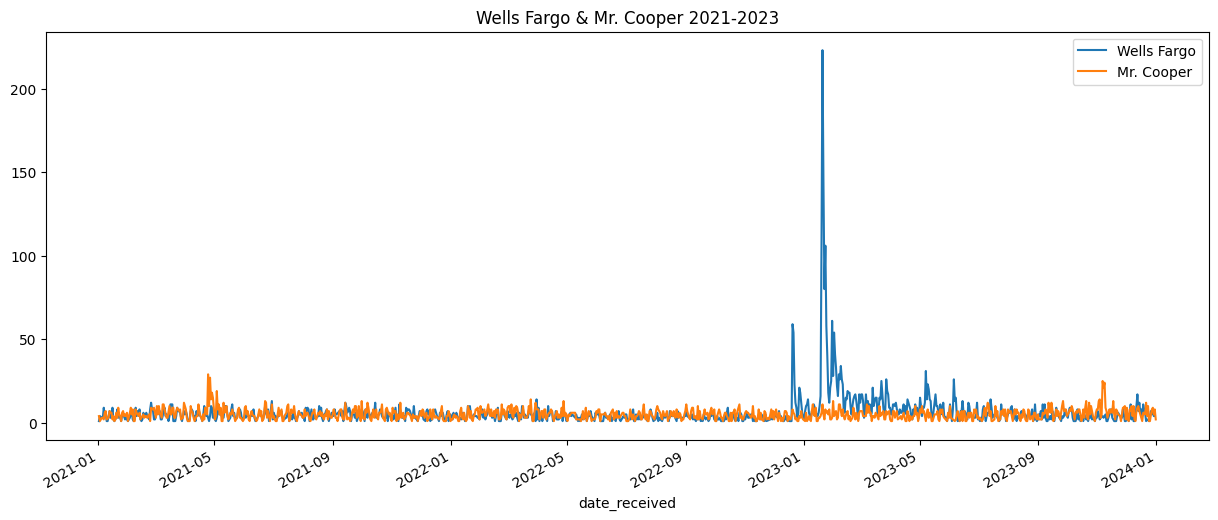

In [39]:
fig, ax = plt.subplots()
fs = (15, 6)
wells_cooper = df.loc[(df.company.isin(['WELLS FARGO & COMPANY', 'Mr. Cooper Group Inc.']))&(df.year>2020), ['date_received', 'company', 'complaint_id']].groupby(['date_received', 'company']).count().reset_index()
_ = wells_cooper.loc[wells_cooper.company=='WELLS FARGO & COMPANY'].rename(columns={'complaint_id':'Wells Fargo'}).plot('date_received', 'Wells Fargo', ax=ax, figsize=fs, title='Wells Fargo & Mr. Cooper 2021-2023')
_ = wells_cooper.loc[wells_cooper.company!='WELLS FARGO & COMPANY'].rename(columns={'complaint_id':'Mr. Cooper'}).plot('date_received', 'Mr. Cooper', ax=ax, figsize=fs)
